# Shifted Sphere Function with PSO

### dimension = 500

In [1]:
import numpy as np
import random

from matplotlib import pyplot as plt
import time

start_time = time.time() # To evaluate computational time


In [2]:
class Particle:
    def __init__(self,x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual

        for i in range(0, num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])
            
    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i        
            
    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w=0.4       # constant inertia weight (how much to weigh the previous velocity)
        c1=1.5      # cognative constant
        c2=3        # social constant

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social
            
    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0, num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]       



In [3]:
def PSO(costFunc,x0,bounds,num_particles,maxiter):
    global num_dim  

    
    num_dim = len(x0)
    err_all = np.empty((0,1))
    err_best_g = -1                   # best error for group
    pos_best_g = []                   # best position for group

    # establish the swarm
    swarm=[]
    for i in range(0,num_particles):
        swarm.append(Particle(x0))

    # begin optimization loop
    i=0
    while i < maxiter:
        #print i,err_best_g
        # cycle through particles in swarm and evaluate fitness
        for j in range(0,num_particles):
            swarm[j].evaluate(costFunc)
           
            
            # determine if current particle is the best (globally)
            if swarm[j].err_i < err_best_g or err_best_g == -1:
                pos_best_g = list(swarm[j].position_i)
                err_best_g = float(swarm[j].err_i)

        # cycle through swarm and update velocities and position
        for j in range(0,num_particles):
            swarm[j].update_velocity(pos_best_g)
            swarm[j].update_position(bounds)
        
        
        err_all = np.vstack((err_all,err_best_g)) 
        i+=1        
          
    return  err_all, pos_best_g, err_best_g 
   
    


In [4]:
def PSO(costFunc,x0,bounds,num_particles,maxiter):
    global num_dimensions    

    
    num_dimensions = len(x0)
    err_all = np.empty((0,1))
    err_best_g = -1                   # best error for group
    pos_best_g = []                   # best position for group

    # establish the swarm
    swarm=[]
    for i in range(0,num_particles):
        swarm.append(Particle(x0))

    # begin optimization loop
    i=0
    while i < maxiter:
        #print i,err_best_g
        # cycle through particles in swarm and evaluate fitness
        for j in range(0,num_particles):
            swarm[j].evaluate(costFunc)
           
            
            # determine if current particle is the best (globally)
            if swarm[j].err_i < err_best_g or err_best_g == -1:
                pos_best_g = list(swarm[j].position_i)
                err_best_g = float(swarm[j].err_i)

        # cycle through swarm and update velocities and position
        for j in range(0,num_particles):
            swarm[j].update_velocity(pos_best_g)
            swarm[j].update_position(bounds)
        
        
        err_all = np.vstack((err_all,err_best_g)) 
        i+=1        
          
    return  err_all, pos_best_g, err_best_g 
   
    


In [5]:
Dimensions=500
f_bias = -450
lower_bound = -100
upper_bound =  100

In [6]:
shift_sphere=[97.24993590965357300000     ,   77.06098501613456600000     ,   -19.03114880399589000000    ,   25.42869799694116800000 ,   -22.90880262549710300000    ,   69.57217579469019600000 ,   5.36971392621788370000  ,   61.48073069080828600000 ,   -21.30069854316695900000    ,   92.34681338401503600000 ,   -93.97588122564035000000    ,   90.74598676939245900000 ,   42.87698026959782300000 ,   29.30964629938293300000 ,   -10.66954845459112300000    ,   -65.07461779584801300000    ,   67.04941630852383100000 ,   94.01877030471266000000 ,   -73.00502019122909300000    ,   -49.80219854393570200000    ,   82.00142499321935900000 ,   35.29318272568596600000 ,   24.63214921806896000000 ,   2.44313746870940920000  ,   -99.30345089151904900000    ,   -54.62233878006055900000    ,   95.69145814488834400000 ,   72.25048084393671400000 ,   -97.12295522295288200000    ,   -2.84462701932042710000 ,   -16.71940701162688500000    ,   54.58048362315878400000 ,   -2.37049344720678330000 ,   4.51291384961226070000  ,   56.40988583280474700000 ,   18.24586955813296600000 ,   -74.72144480585325300000    ,   -78.05614655111506300000    ,   32.58107757924415200000 ,   99.41862299092051100000 ,   -30.76381166032487600000    ,   -64.78909692160539200000    ,   -86.42220774684709300000    ,   -38.12082265661986500000    ,   -33.04804035360201900000    ,   -24.76648648072296100000    ,   90.44136625242035200000 ,   43.86410226026328000000 ,   55.86848705729144600000 ,   23.53173226692698000000 ,   29.84766683958318400000 ,   51.25666093528096200000 ,   -70.43316211574477800000    ,   19.89073552695180100000 ,   79.72173786670555300000 ,   -65.61342888884523500000    ,   63.78562161574140500000 ,   -86.14124825380231700000    ,   91.13745240182416300000 ,   -36.53243248356071900000    ,   -98.95976530996462400000    ,   51.98710144331872100000 ,   -38.26403602795727500000    ,   43.05113500849307700000 ,   -83.81049636930025300000    ,   69.17558481595747800000 ,   43.67524066255938900000 ,   74.07859960382373300000 ,   74.43193847322515900000 ,   52.31264480608896900000 ,   33.89129180064085700000 ,   80.40565424264377700000 ,   64.29246395985669000000 ,   66.53145387977843900000 ,   27.98358669457721200000 ,   -68.75913548407889700000    ,   56.63358891049304600000 ,   46.28107962319185700000 ,   12.94639203089067800000 ,   44.66985190810865400000 ,   -52.05238075825224800000    ,   -2.02829331827740590000 ,   -15.27946394354836500000    ,   59.13551043862307200000 ,   52.68199692610483000000 ,   -52.22223889011473800000    ,   27.02186596243446100000 ,   -53.69095731991106400000    ,   23.18763620963098000000 ,   -46.29908950168676500000    ,   98.24262957199073300000 ,   52.06377469815248600000 ,   -3.56652609969421520000 ,   89.04006716883324700000 ,   -27.85234608315173000000    ,   -83.12179278970515400000    ,   89.70270649541137700000 ,   38.16549772048793400000 ,   23.10171739480442500000 ,   78.99561181861344000000 ,
    -97.49235781815141900000    ,   -39.81759244665622800000    ,   93.01615151458622700000     ,   -79.58189364479054000000    ,   19.20434519560116400000 ,   -6.20446461109965240000 ,   43.46512790033281700000 ,   71.77418665060116600000 ,   -62.88031805830194500000    ,   -7.52500587978993000000 ,   80.65995193805525800000 ,   -95.57909825978666200000    ,   52.08123068245876700000 ,   59.17039996711383800000 ,   -37.22981867102029700000    ,   -52.83496064108958700000    ,   -1.10964319252536820000 ,   37.05089124051562500000 ,   88.92673883020552200000 ,   -12.13761636172732500000    ,   -0.51312950708378935000 ,   -80.27641534655981600000    ,   10.88750298986855100000 ,   -12.86113608232777500000    ,   -63.74708542625897700000    ,   -69.23763774266318200000    ,   86.74587574527421900000 ,   -72.74687803096414000000    ,   99.70899935097551700000 ,   38.12412523200211500000 ,   92.20849118145670800000 ,   55.10030133676218600000 ,   -99.85517322512082200000    ,   -34.90571766924075800000    ,   8.82072627822991250000  ,   -38.69873620893375900000    ,   34.54077799464138800000 ,   -30.85733574867262500000    ,   96.11988328018659900000 ,   -29.20633801176134600000    ,   -96.09690425027751800000    ,   62.55041033617806100000 ,   96.56288746150539700000 ,   -37.63283835003192500000    ,   -24.21831355716469100000    ,   49.60588943995483600000 ,   -11.43398464858445600000    ,   -80.02169984880056600000    ,   98.52449028298639200000 ,   7.25239184757784020000  ,   -73.09040635953140000000    ,   -73.73999907228132100000    ,   72.79873603508286800000 ,   41.65449704336006700000 ,   99.64813946569225300000 ,   63.15138329358606500000 ,   56.44797301426422100000 ,   52.72314983280077200000 ,   80.99504852550765600000 ,   -79.37562575095938700000    ,   -57.65792487909280300000    ,   70.21772370979999800000 ,   48.59303214600944900000 ,   -18.98579993986609800000    ,   -38.99163748241761600000    ,   -5.16100516872300830000 ,   -71.05246684708896500000    ,   -1.13196998028767840000 ,   6.02484762064253230000  ,   2.04848517008362310000  ,   -54.50616909862967700000    ,   86.99878289473733200000 ,   3.53841681865669950000  ,   -8.14781920164118390000 ,   55.34759804937132800000 ,   46.76064918217531400000 ,   20.47638482621165700000 ,   -88.61419388788037600000    ,   -85.59936016837689000000    ,   27.13632695164240300000 ,   75.26676447007594100000 ,   -14.50411139227463800000    ,   41.68068389222762000000 ,   -85.96197595053502000000    ,   -96.18696774198319600000    ,   1.66197114043225720000  ,   73.88119843077100800000 ,   59.70980236526125400000 ,   59.84681121496655000000 ,   -60.77733983319829700000    ,   42.87487476805733900000 ,   -56.99831487075532300000    ,   57.30148415664177700000 ,   -65.57049470329903300000    ,   -58.77055395473770000000    ,   -7.10516181400907950000 ,   -85.09469902178732100000    ,   19.31610200840442800000 ,   -61.80190642381895600000    ,   86.96347319841376600000 ,
    -38.49749884025003200000    ,   -7.62157599690188190000     ,   65.95065661925761400000     ,   -39.97249875193823200000    ,   41.92397033974751300000 ,   -85.07978509149666000000    ,   50.04316260071533400000 ,   -6.21891961570904070000 ,   88.98279298172431600000 ,   -97.20522037062968900000    ,   -89.16023096382825500000    ,   47.68977344570851100000 ,   27.11301611807175500000 ,   86.19443924789692300000 ,   -7.80787892008540040000 ,   2.57798871436938270000  ,   -15.10377742583499100000    ,   -16.81661272875601300000    ,   -22.35314324942116600000    ,   71.10744173135051900000 ,   64.60378242195795900000 ,   82.78206951585093500000 ,   67.20838827931737600000 ,   73.61751737539700000000 ,   55.11745119722596100000 ,   -13.61441524813103900000    ,   -12.78040275819448400000    ,   -55.13905478392133100000    ,   -97.36313194840487000000    ,   -24.80674999069258000000    ,   67.71246220983275100000 ,   -42.75133257233958500000    ,   -43.17417427877284600000    ,   -34.58393101868755100000    ,   -4.75814793744594060000 ,   -54.80333094806282900000    ,   92.40123913786831600000 ,   -38.70835495960977100000    ,   55.78511705051215600000 ,   79.06848866780734400000 ,   -49.25533619683740500000    ,   -70.84933252614011700000    ,   -31.70074547788492200000    ,   46.62693698118863500000 ,   -93.22721735410210900000    ,   8.84775196171983680000  ,   11.68908008292062600000 ,   33.93674447251407900000 ,   16.78538450494538400000 ,   37.18181772986596900000 ,   53.19677356418623000000 ,   79.53242319958062000000 ,   93.35793403569508100000 ,   81.15870580045310600000 ,   -64.28412282628079300000    ,   95.69760550024915300000 ,   79.59714847953333100000 ,   -94.12771936779242300000    ,   -43.59552874637814300000    ,   -62.41977029388565500000    ,   21.75070181052409200000 ,   -58.12912338697452000000    ,   99.54693278957125800000 ,   -96.64763586482638400000    ,   -12.07436783635719700000    ,   -70.32096206631598500000    ,   24.28918727452192200000 ,   50.87375697663614500000 ,   -43.88060949637996100000    ,   5.43593638943180220000  ,   -37.51188408691847100000    ,   -63.65182631423304800000    ,   55.85058880170478800000 ,   61.90181252802094000000 ,   44.66258926442589000000 ,   -90.93810202739528800000    ,   22.65995004787527000000 ,   -32.95702219867646900000    ,   16.77251890717583600000 ,   82.63556229819127500000 ,   0.25449912911706463000  ,   -16.49809138116450000000    ,   59.89150083561116800000 ,   78.12183232356542800000 ,   2.67066641660080960000  ,   -22.05470757940591400000    ,   86.12774026868871100000 ,   -43.45357000930668800000    ,   53.98742866827299700000 ,   45.51664256360621200000 ,   82.92159945599655700000 ,   -78.77591751193725100000    ,   77.78752210495335400000 ,   19.00808932987052900000 ,   -97.58400883280657500000    ,   -52.33712471639634600000    ,   -75.27522954019370600000    ,   76.15686282581836500000 ,   62.64645530163565500000 ,   52.66766096653998400000 ,
    62.07741442828748300000     ,   36.45077351273460000000     ,   24.96041394745942900000     ,   -26.38429171436752100000    ,   -59.44395732876611800000    ,   -44.98975713146946700000    ,   -3.69122686250716470000 ,   -19.96175103488795300000    ,   40.45916687903343200000 ,   -35.72781039873778800000    ,   -90.30936674815423300000    ,   55.49723557611773100000 ,   10.68057462331815100000 ,   -86.45012992781835200000    ,   -0.76469971949782689000 ,   67.22103542445029200000 ,   -7.81317963735759240000 ,   56.00508038971503300000 ,   -1.65122658894387090000 ,   39.14279211585812800000 ,   97.01238060439811800000 ,   -29.36554803071439300000    ,   24.39833417798693900000 ,   3.17875094282786110000  ,   63.00645426624274100000 ,   -2.18720117961737510000 ,   46.29191306665819600000 ,   42.11489832714980300000 ,   66.88232665705064100000 ,   -97.81516458004149700000    ,   -90.32459330815390800000    ,   0.25346876145637509000  ,   -41.66213605436386300000    ,   -97.24146790547285900000    ,   58.83556948138033200000 ,   -86.54346545450889000000    ,   -37.96443030352412500000    ,   -31.99891672188019200000    ,   63.35558292571201400000 ,   -99.12543214360789500000    ,   -1.23679561444596690000 ,   22.68960822894399600000 ,   -25.18375921508618400000    ,   -60.33835971349703400000    ,   79.01352847812154300000 ,   97.36971661875526300000 ,   84.35601840368934700000 ,   -21.11653194278265700000    ,   32.45749604539415100000 ,   8.02198202119350870000  ,   -57.78410389508923100000    ,   -38.93401794237385600000    ,   -97.31952221166506000000    ,   -99.08761171288730900000    ,   97.55738221717359700000 ,   62.35938710122624700000 ,   54.08113812261666500000 ,   80.65704973427671100000 ,   -75.24517683615812300000    ,   -80.78409115934295000000    ,   10.29351288759036700000 ,   -98.69648227569848600000    ,   -74.86134025224330900000    ,   -88.84401371334237800000    ,   52.53474097086129300000 ,   -85.71968813904447900000    ,   43.64667055778684800000 ,   -71.91840060753845900000    ,   23.13967109515526500000 ,   -5.69816177113035850000 ,   2.07051431523206020000  ,   -30.99138483886470400000    ,   -83.04840725136523400000    ,   -48.83973075856163600000    ,   5.11437933443139060000  ,   -71.89304760266787800000    ,   -75.90581570492833000000    ,   0.54777506327916115000  ,   -42.81735766875321800000    ,   -77.60656063526960200000    ,   0.00925284926150027330  ,   -24.41980344153400000000    ,   -45.88823713242364000000    ,   91.33820519326704400000 ,   -8.38641290890127780000 ,   -50.99588269669321500000    ,   66.09141433457475000000 ,   -39.36525557247235700000    ,   -93.35611687490073500000    ,   97.51186377046187200000 ,   -4.04474932716868810000 ,   20.70716096976977400000 ,   3.24976078397540390000  ,   95.45219331563578200000 ,   -50.56033799662103700000    ,   33.63891665995194600000 ,   -70.65367611407863500000    ,   -18.97553399740897400000    ,   -71.58942644041434300000    ,   -31.15079673832966000000    ,
    9.98641319710080210000      ,   -91.51365871960581400000    ,   -53.60802535083180900000    ,   -20.24186156150172200000    ,   -75.86179939604426200000    ,   -11.47398543871260300000    ,   -89.70953701259460900000    ,   99.32932368466359200000 ,   38.87526874399313200000 ,   23.00433457981884500000 ,   23.43092087302063900000 ,   65.94783670265121600000 ,   95.85711374124156200000 ,   -12.51305080072977200000    ,   69.24206682783355400000 ,   -20.58327274667772100000    ,   -15.92563977506986800000    ,   78.39762116494674200000 ,   -30.86765923097486600000    ,   61.68259050572189000000 ,   98.85525373742939300000 ,   56.21275019698958900000 ,   70.36175050930054900000 ,   32.12220673489213100000 ,   -45.57745026401929100000    ,   -51.83135349355550400000    ,   -14.81528015640749600000    ,   19.51162516939749000000 ,   -15.99176052707839800000    ,   53.50483110175895300000 ,   -94.86165740677147100000    ,   38.55860537701454400000 ,   50.68764647622344900000 ,   90.71158494117617000000 ,   -22.53558492764045700000    ,   -88.76873273262982900000    ,   -24.93196055146611900000    ,   31.50263582242701000000 ,   40.35330292084893200000 ,   -81.85263502157596300000    ,   89.59741781038013600000 ,   6.96976919633382860000  ,   82.04807599272732000000 ,   -38.13782509862372200000    ,   44.97900249651399900000 ,   -23.30821372244091100000    ,   79.77461244155307400000 ,   -86.31238816669105100000    ,   -47.00006611741869000000    ,   24.91224434259716200000 ,   36.05582734296569900000 ,   47.38016887041030100000 ,   86.59610912761769400000 ,   22.93422625452312500000 ,   47.66102131994145500000 ,   27.30517886675581000000 ,   -65.97335610264704500000    ,   -45.53288330217897300000    ,   62.48955977951743500000 ,   -19.34780690610654100000    ,   32.01653590228787000000 ,   -42.78820269058643100000    ,   92.27668151874729600000 ,   15.31119812736588400000 ,   93.32576548094613100000 ,   2.78418894527190730000  ,   72.84466343415596200000 ,   -54.93449848804225900000    ,   -51.30899368074769000000    ,   79.76528564173904100000 ,   41.83951568729810300000 ,   95.02868369769962000000 ,   -8.08714822525051600000 ,   48.35491237332320200000 ,   33.79344902620297800000 ,   -94.07751056336894600000    ,   -29.92877912656443600000    ,   -83.58677451974158100000    ,   -87.83250463317082800000    ,   52.01898855285915600000 ,   25.56617853773674700000 ,   6.09339210024553780000  ,   97.85237871959969900000 ,   -39.40758191604886200000    ,   -63.85974942124932600000    ,   13.85001878181412800000 ,   -6.68558326416182070000 ,   -21.55417329511396900000    ,   -94.51863252461231500000    ,   -31.70409417271990500000    ,   95.26982058583385500000 ,   15.38700033656749600000 ,   54.12802539797240800000 ,   25.28229285346547800000 ,   46.60999117571239500000 ,   -70.13172984564309300000    ,   -17.07178024577955000000    ,   -86.20305242799581400000    ,   76.83881242659475700000 ,   66.39885845386893900000 ,
    -36.95789803061930500000    ,   79.61088663643190000000     ,   50.61960207601384800000     ,   -69.49010631377966300000    ,   43.08276052247316600000 ,   68.32762473036567000000 ,   56.69151159174688800000 ,   99.56590375229802700000 ,   17.22280571359311800000 ,   -27.84388844826263200000    ,   -25.21820517708839300000    ,   97.44400197280663200000 ,   77.44156623443612400000 ,   -62.87372734235888300000    ,   -51.17369564792591800000    ,   -50.62612429464457600000    ,   -65.23698564166788600000    ,   -33.13896506540116600000    ,   -18.75503088964211400000    ,   24.75530252455190800000 ,   79.60143376389496000000 ,   35.83301681831929400000 ,   -73.69141696962108800000    ,   -5.42205258428029420000 ,   93.48963543921499300000 ,   -0.24742561654541362000 ,   -20.58360221742022100000    ,   97.64467668146562600000 ,   53.66568582343668900000 ,   96.62894063429735100000 ,   -52.14590771275206300000    ,   -6.69076852942235690000 ,   -92.93015922018619800000    ,   47.42909565811075400000 ,   69.93943393397873400000 ,   3.33969555710874030000  ,   -71.28201831892307900000    ,   55.39656551317637000000 ,   -10.50910432946011500000    ,   -66.90750504140987700000    ,   -48.68499996987560500000    ,   45.86722963630640500000 ,   -87.73890071756108000000    ,   -77.34403803807563800000    ,   62.92826492168302400000 ,   -7.69678636429492260000 ,   81.75832248155865000000 ,   79.26301963258958900000 ,   -58.60445790576935800000    ,   74.81865777172689000000 ,   -52.54169806593972700000    ,   36.86077204960270100000 ,   92.02418816673798600000 ,   -14.68446748100356600000    ,   -65.16558114535622800000    ,   -20.52558010911739900000    ,   34.18668788199624900000 ,   -2.98750137278440770000 ,   -23.48162327160481800000    ,   12.70403584953963600000 ,   -2.02255542751453280000 ,   -68.97668009349743600000    ,   30.22988275234172300000 ,   45.39900294310282900000 ,   -99.26509320062587000000    ,   81.82858206584094800000 ,   32.37216627171170600000 ,   -90.07209641149069100000    ,   -9.55504023605855930000 ,   -67.18115779374072400000    ,   -5.86457195032504330000 ,   64.69380321305578700000 ,   69.99749975584111900000 ,   92.84523265392977000000 ,   62.53733158796214300000 ,   -47.12192306505309600000    ,   -58.72972437538753400000    ,   86.44301072195764800000 ,   -21.33224603954637600000    ,   -87.52564078452614600000    ,   -91.23933868710933800000    ,   -98.77204942400017300000    ,   63.42230041672777900000 ,   83.03615301612896400000 ,   48.32802541421003200000 ,   -59.23451111961383500000    ,   -53.15671449921015300000    ,   79.69868303064399100000 ,   57.55085727813923300000 ,   -63.40459538115789700000    ,   1.14716175581652640000  ,   -87.80307819628716000000    ,   -72.94351885397352900000    ,   -95.55160679805924000000    ,   73.96497441335301900000 ,   22.82439706328420900000 ,   -32.17162594205088100000    ,   37.13233168823777000000 ,   -56.52387643423431000000    ,   -53.71379925674707300000    ,
    -11.55675373783852000000    ,   -33.22553299168275500000    ,   -46.69862829585056100000    ,   50.99818829391261900000 ,   -16.74095214074520800000    ,   90.09345095963260500000 ,   67.31584170765972900000 ,   79.17522627888354200000 ,   -48.94353708164660300000    ,   4.22185547613855760000  ,   -32.64892078760310300000    ,   31.23778683753479900000 ,   -21.03049550093051300000    ,   -79.86516578093323900000    ,   -7.61747850140959320000 ,   11.27175722953369100000 ,   -39.53502698013324600000    ,   26.15204772878152500000 ,   4.85914364944592590000  ,   -38.22235017318451600000    ,   -7.38072468006267000000 ,   -73.48231122593315900000    ,   52.20888817392074100000 ,   -73.01574539251200200000    ,   -13.77348578837140300000    ,   71.85500232567690700000 ,   -6.60376042071075630000 ,   -42.75425832789983400000    ,   -86.94668359767447900000    ,   31.40341066158654800000 ,   26.05262690445482600000 ,   46.30638487444517200000 ,   90.98150081565691500000 ,   -26.13447406607855300000    ,   -86.11941758194566900000    ,   73.50477179036903400000 ,   -41.06719652997998800000    ,   10.67494950675909100000 ,   56.43145686616338700000 ,   -85.96468349688368000000    ,   26.67163196256096600000 ,   -91.77742072383338700000    ,   -95.15391094997180200000    ,   44.34824399227716200000 ,   77.15746583861897500000 ,   87.43757506205278700000 ,   84.94312462399156500000 ,   51.26348785668039900000 ,   -24.51667040840520400000    ,   66.83702696177772400000 ,   37.32910865505851900000 ,   11.04002958684287700000 ,   -82.76779222529717100000    ,   10.95357865446730700000 ,   35.88127087147142900000 ,   -14.49828841353108500000    ,   -67.41828120880700200000    ,   38.69784264695778100000 ,   3.83440988638461990000  ,   60.10955190462303200000 ,   55.68834028273767000000 ,   85.60650548966734200000 ,   45.24351276581413100000 ,   -80.92372435208335400000    ,   -10.14007527456783500000    ,   95.32154928451456000000 ,   93.78882821996273800000 ,   29.05401797517038200000 ,   -81.45058267307489100000    ,   54.40760552564108800000 ,   -19.20578692744551600000    ,   -44.05837641917052100000    ,   -54.71050841675624100000    ,   -71.03877555662035100000    ,   -81.44109293651885700000    ,   40.54408218247942800000 ,   36.24242082745584500000 ,   -8.47204982469142460000 ,   6.46906942904817580000  ,   -40.33054315480399800000    ,   -19.40075493136002600000    ,   -69.50649336887991600000    ,   58.04086901127442400000 ,   -60.28799325477358200000    ,   -1.10545952059494820000 ,   -39.34726875286159500000    ,   -70.41115147462515700000    ,   92.80283088672399600000 ,   47.38059071368735400000 ,   3.74964979247205580000  ,   79.65612728897545500000 ,   41.40010803858632500000 ,   -21.03606643932097600000    ,   28.43842935090557900000 ,   -39.13322492378977600000    ,   -83.03217796657648400000    ,   77.08244610529934000000 ,   -81.20507121235532100000    ,   90.24335394736616000000 ,   23.63605461842239200000 ,
    52.11478752411136400000     ,   24.14486584386419600000     ,   15.84640132412819500000     ,   -43.82937607722203700000    ,   -80.04706960118886600000    ,   44.31313414275882700000 ,   68.28779154337678400000 ,   64.25001691654742300000 ,   8.71290419639447580000  ,   -27.11944195608630500000    ,   0.18701977249745028000  ,   -33.92043466329629100000    ,   -53.89063805440495300000    ,   20.98561881957445500000 ,   -90.53168444046326600000    ,   47.30987443861124600000 ,   -2.45356053813368650000 ,   97.15523415216839000000 ,   95.69548437094454100000 ,   -71.53911173645906300000    ,   85.79129306664529500000 ,   -96.83475114498142500000    ,   45.54625330649241700000 ,   46.75173042120451300000 ,   -86.41023142925946800000    ,   59.49671558780903500000 ,   -9.33962252205252240000 ,   -57.85694082863782500000    ,   47.05022763251639600000 ,   15.47842864452624700000 ,   57.89188251409319700000 ,   -83.45090770180871700000    ,   -24.84431407785299900000    ,   -59.80834153124190800000    ,   29.14618319701801900000 ,   -75.22493709969633400000    ,   1.50456315615552680000  ,   -78.88627888999998600000    ,   -94.17907077369977700000    ,   -89.86477575706409500000    ,   -63.45568094511197200000    ,   1.93290417124237020000  ,   29.52231569541669400000 ,   1.91736959886364390000  ,   19.83697448511090000000 ,   -32.71653071867845600000    ,   44.69971432535717800000 ,   -76.38669693404594300000    ,   3.96781515082729190000  ,   99.03360058142484900000 ,   -37.33029743302992600000    ,   1.16020513621104730000  ,   63.95622276924106600000 ,   -40.25947282560210300000    ,   41.71915313772115000000 ,   73.89980459203260900000 ,   31.29525980595170200000 ,   72.43811766573858800000 ,   85.31962591113710900000 ,   87.74670955705050800000 ,   33.14373692123538700000 ,   19.54564151262130200000 ,   -19.09467856769421700000    ,   -73.19461264672017400000    ,   -39.60890427290330300000    ,   -7.93457735328165370000 ,   0.65514028161123861000  ,   52.58723887329460900000 ,   88.85516310034199700000 ,   29.96913801794858000000 ,   89.27403306303156700000 ,   -7.25678969061135600000 ,   -45.76561614861108800000    ,   -86.12238568988055900000    ,   -62.52315523976685100000    ,   -30.19248925492247800000    ,   82.86078534630883000000 ,   -97.24736933524778200000    ,   97.50597953700076900000 ,   -65.19534322178083100000    ,   -19.40891939668527800000    ,   -20.14795348562614700000    ,   57.13147933117912200000 ,   1.17676320085374190000  ,   12.47534471127261200000 ,   40.24756542823305900000 ,   -42.92525965054832000000    ,   97.32735737332853900000 ,   -55.13640986064467600000    ,   0.19081725344798883000  ,   -14.01620088760965600000    ,   3.20048842102704610000  ,   -90.62837012622745200000    ,   92.93061556640518000000 ,   -86.84660933809139700000    ,   2.00382654275341570000  ,   41.07840368634643400000 ,   24.98101496767472400000 ,   -54.50119262456243500000    ,   26.13542840044640100000 ,
    -69.36918897715818800000    ,   -37.84208915610900400000    ,   29.86335663888834800000     ,   67.11545565960130900000 ,   -96.45942971783912900000    ,   -19.11979361819226100000    ,   59.90291016436415800000 ,   -68.08356995143908800000    ,   -37.51464501785957100000    ,   26.21548554044774400000 ,   18.20408056352276600000 ,   -89.10419151273345100000    ,   73.89620627378795300000 ,   45.59747037386304700000 ,   -96.68871175949851700000    ,   48.81706173359768300000 ,   -41.66472077351919300000    ,   51.29642033635269600000 ,   -79.25013431035081600000    ,   -54.51413729873306800000    ,   -2.41139195366152140000 ,   74.65378793368643100000 ,   15.81507924749279000000 ,   -15.74199896114272700000    ,   62.65400153092889500000 ,   39.05443958117678000000 ,   -11.74030756865003900000    ,   -5.86150691975642250000 ,   76.28457063990663300000 ,   29.02403735801769400000 ,   -70.75364992064101000000    ,   -57.52275741132728400000    ,   -74.80646233596054600000    ,   7.21908512507980050000  ,   67.97153250793027700000 ,   -52.01856376986939500000    ,   -95.53366054207771200000    ,   -70.33293121030340000000    ,   -4.86179469686926780000 ,   75.60505240251777100000 ,   72.64198724374017500000 ,   99.22596071582836400000 ,   51.46405556295096100000 ,   77.15230672416711900000 ,   -26.26298560539974900000    ,   43.19095980263236400000 ,   -42.85734294342129400000    ,   57.89612066787142900000 ,   -58.91580028640987600000    ,   -14.03021579890541700000    ,   25.76775691828456200000 ,   11.86979066591338500000 ,   -50.73122858522588500000    ,   31.30480571348570600000 ,   -73.53595669563554800000    ,   2.68187956197986920000  ,   -45.20017457701803900000    ,   17.46930502503289500000 ,   -46.31270743195287300000    ,   56.85494296150650900000 ,   -70.27728544044563800000    ,   54.65848376869604400000 ,   3.98209313186121960000  ,   17.34311823993188300000 ,   3.79585470888828520000  ,   -71.88636768720549200000    ,   -36.81611163174327600000    ,   72.25580210869301800000 ,   -13.31024781716291700000    ,   -88.10601232494798300000    ,   77.17223260675848500000 ,   -48.80308799980129900000    ,   -42.48994712994149800000    ,   -55.21149343756659500000    ,   18.24443748358832800000 ,   12.86611699497737500000 ,   73.18947722486157700000 ,   -56.07013797867604400000    ,   -39.75241527572958200000    ,   17.41109297197741100000 ,   80.40975720930529700000 ,   4.74913467465729870000  ,   33.75010939676198500000 ,   35.37624587457457900000 ,   90.58463714493498700000 ,   24.78715242497988000000 ,   -8.42003898954270370000 ,   29.55288762283368000000 ,   95.77336409058881400000 ,   -15.71023436730477800000    ,   95.15745046162177800000 ,   3.72147625300816290000  ,   8.57910750721558200000  ,   -24.17492992969593500000    ,   69.83394262870660900000 ,   9.11601875935478740000  ,   63.02998586099502600000 ,   -2.85018254718092120000 ,   -76.76120457429181000000    ,   -71.31360641963874500000    ,
    56.93711510308935400000     ,   -46.21288572671580400000    ,   11.35113506447926600000     ,   -72.85878142817142600000    ,   -15.09224045748489100000    ,   -88.47345908993661100000    ,   59.36326728738021100000 ,   11.90213396180314500000 ,   54.27192187513313100000 ,   99.00284657447281200000 ,   -82.08776754116596000000    ,   44.26584716325280100000 ,   99.46505365818663300000 ,   -78.38228904249034200000    ,   -8.64844172720921730000 ,   -73.38964273268214800000    ,   40.76771307382685400000 ,   -38.74555569101225700000    ,   -87.13598222823654300000    ,   -65.24516583853423400000    ,   -61.49970009802935100000    ,   34.07036440070146500000 ,   -22.58728313144206400000    ,   -85.94636835295722200000    ,   36.20971058495791800000 ,   71.23064655846243900000 ,   -80.58044908052617900000    ,   -21.62760771492335700000    ,   -24.80940455426818400000    ,   3.10359882967216550000  ,   78.85327207094604800000 ,   28.36420875951913000000 ,   -59.34480191154267500000    ,   -86.22365441823610900000    ,   60.02898557062769700000 ,   -15.38819509238572900000    ,   78.46335582639932200000 ,   98.38151247584866600000 ,   -19.82474341108654400000    ,   -31.86225569100558600000    ,   -36.65183187367716800000    ,   -27.14246425749964000000    ,   23.14647663891568600000 ,   19.49038935301818800000 ,   37.04766966359423500000 ,   94.76410137589931500000 ,   -43.93462190798459200000    ,   -65.20637294258216300000    ,   84.38178935532531000000 ,   -47.95111845092138500000    ,   -24.98768046280503100000    ,   28.94844827823061500000 ,   -36.70632643469934200000    ,   -61.51678732031078300000    ,   -53.36542357863867600000    ,   -56.03136100456298900000    ,   -84.11231727654286800000    ,   -75.22520911793509400000    ,   7.51689509329132480000  ,   37.77251801696760900000 ,   44.02385008952347800000 ,   87.76034998885330700000 ,   -98.35525372359836600000    ,   16.33642066256220500000 ,   11.26936550651240100000 ,   37.87548969294658700000 ,   52.19054730110741500000 ,   64.85838960954728800000 ,   5.53855684577094110000  ,   -31.69718191777616300000    ,   -86.34245618064005600000    ,   -47.19178339400414800000    ,   98.83365114624135100000 ,   -22.91086339613045200000    ,   57.25008367056599900000 ,   73.92214560596522700000 ,   -82.96089867870949800000    ,   -3.25824787285087330000 ,   68.91021272548195500000 ,   -6.83209497323650790000 ,   19.84725294961022300000 ,   -58.36900383032613600000    ,   3.41142692653527040000  ,   -68.39847131024934900000    ,   48.87562091205813900000 ,   -2.18459895881622400000 ,   29.92881142924991900000 ,   -91.64893258984297100000    ,   -33.03680350623936600000    ,   -13.32876046605892400000    ,   -80.28183356117644100000    ,   36.18457664748996200000 ,   -94.57534864988009800000    ,   -35.83037634512183400000    ,   -89.50399559301058600000    ,   -26.08849064371725000000    ,   -23.22481211608654000000    ,   -32.82447106681738100000    ,   78.13796681584190700000 ,   -52.37253286863172300000,
]

In [7]:
def Obj_func(x_array, shift=shift_sphere , num_dim=Dimensions, bias = f_bias):
    Obj_func = 0
    for i in range(0,num_dim) :
        Obj_func = (x_array[i]-shift[i])**2 
        Obj_func += Obj_func
    return Obj_func + bias

In [8]:
# Parameter for PSO
initial= np.random.uniform(lower_bound, upper_bound, Dimensions)  # initial starting location
bounds = [(lower_bound, upper_bound,) for x in range(Dimensions)]
Obj_val = PSO(Obj_func,initial,bounds,num_particles=25,maxiter=50)

print ("The best fitness is: ", Obj_val[2])

The best fitness is:  -449.99999999999966


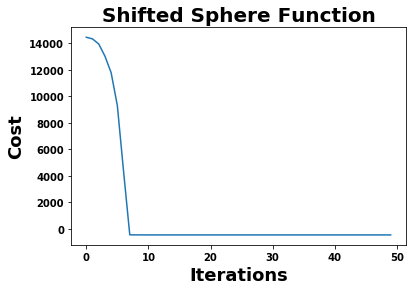

Computational time: 12.253 seconds


In [9]:
plt.plot(Obj_val[0])
plt.title("Shifted Sphere Function",fontsize=20,fontweight='bold')
plt.xlabel("Iterations",fontsize=18,fontweight='bold')
plt.ylabel("Cost",fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

print("Computational time: {:.3f} seconds".format(time.time()-start_time))